In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# parentDir = os.path.dirname(os.getcwd())
# sys.path.insert(0,parentDir )

myMods = os.path.join(os.getcwd(), "myMods")
sys.path.insert(0,myMods)
import mainFun.apiFix as apiFix
import mainFun.createReport as createReport
import mainFun.getView as getView
import mainFun.loadHelper as loadHelper
import mainFun.vennPlot as vennPlot

In [3]:
import utils

In [4]:
api_df1  = loadHelper.loadPickle('rawData/api_df1.pkl')
api_df2  = loadHelper.loadPickle('rawData/api_df2.pkl')

In [5]:
plt.rcParams["figure.figsize"] = (20,10)

In [6]:
os.getcwd()

'C:\\Users\\Lionel\\Python\\dockerPractice'

In [7]:
# https://www.arothuis.nl/posts/one-off-docker-images/
# Create output and input volume. 
# Put also the main 

# docker run -v $pwd/output:/output -v $pwd/input:/input example3
# docker run -b C:/Users/Lionel/Python/dockerPractice/output:output C:/Users/Lionel/Python/dockerPractice/input:input example4
currentDir = os.getcwd()

# Load Data

p_file1 = 'rawData/api_storage_dict1.pkl'
p_file2 = 'rawData/api_storage_dict2.pkl'
api_storage_dict1  = loadHelper.loadPickle(p_file1)
api_storage_dict2  = loadHelper.loadPickle(p_file2)

# api_df1  = loadHelper.loadAPI1DF(p_file1)
# api_df2  = loadHelper.loadAPI2DF(p_file2)
# pickle.dump( api_df1, open( 'rawData/api_df1.pkl', "wb" ) )
# pickle.dump( api_df2, open( 'rawData/api_df2.pkl', "wb" ) )

api_df1  = loadHelper.loadPickle('rawData/api_df1.pkl')
api_df2  = loadHelper.loadPickle('rawData/api_df2.pkl')



In [8]:
title = 'DRE Report 1'
website = 'https://www.drevidence.com/'

In [9]:
# Create a PDF object
pdf = createReport.DREPDF('P', 'mm', 'Letter')
pdf.set_auto_page_break(auto = True, margin = 15)
pdf.add_font('DejaVu', '', 'ect/DejaVuSansCondensed.ttf', uni=True)
pdf.set_font('DejaVu', '', 14)

In [10]:
# metadata
pdf.set_title(title)
pdf.set_author('DRE')
pdf.set_website(website)

In [11]:
pdf.add_page()
txt = """
I am going to compare the results of two seperate APIs to see if they agree a term has a single Sense.ID 
Report on how lists of strings map to Sense.Id using 2 APIs. 
API1: DocAnalytics
    * This api is how docanalytics identifies terms. 
    * E.G. https://caladan.doctorevidence.com/portal/suggestions?search={stroke}
API2: DocSearch
    * This api is how docsearch identifies terms.
    * E.G. https://search.doctorevidence.com/api/annotator/batch-annotate
"""
pdf.multi_cell(0, 5, txt)
pdf.add_page()

In [12]:
txt = """
How many items are matched in API1
"""
pdf.multi_cell(0, 5, txt)
df = pd.crosstab(index = api_df1['File'], columns = 'Count')
df['File'] =  df.index
df = df[['File', 'Count']]
data = df.values.tolist()
data.insert(0, df.columns.to_list())
pdf.create_table(table_data = data,title='API1 retreval table', cell_width='uneven')
pdf.add_page()



In [13]:
txt = """
How many items are matched in API2
"""
pdf.multi_cell(0, 5, txt)
df = pd.crosstab(index = api_df2['File'], columns = 'Count')
df['File'] =  df.index
df = df[['File', 'Count']]
data = df.values.tolist()
data.insert(0, df.columns.to_list())
pdf.create_table(table_data = data,title='API1 retreval table', cell_width='uneven')
pdf.add_page()



In [14]:
txt = """
How many items are matched in API1
"""
pdf.multi_cell(0, 5, txt)
df= pd.crosstab(index = api_df1['File'], columns = api_df1['N_IDS'])
df['File'] =  df.index
data = df.values.tolist()
data.insert(0, df.columns.to_list())
pdf.create_table(table_data = data,title='API1 retreval table', cell_width='uneven')
pdf.add_page()

In [15]:
txt = """
How many items are matched in API2
"""
pdf.multi_cell(0, 5, txt)
df= pd.crosstab(index = api_df2['File'], columns = api_df2['N_IDS'])
df['File'] =  df.index
data = df.values.tolist()
data.insert(0, df.columns.to_list())
pdf.create_table(table_data = data,title='API2 retreval table', cell_width='uneven')
pdf.add_page()


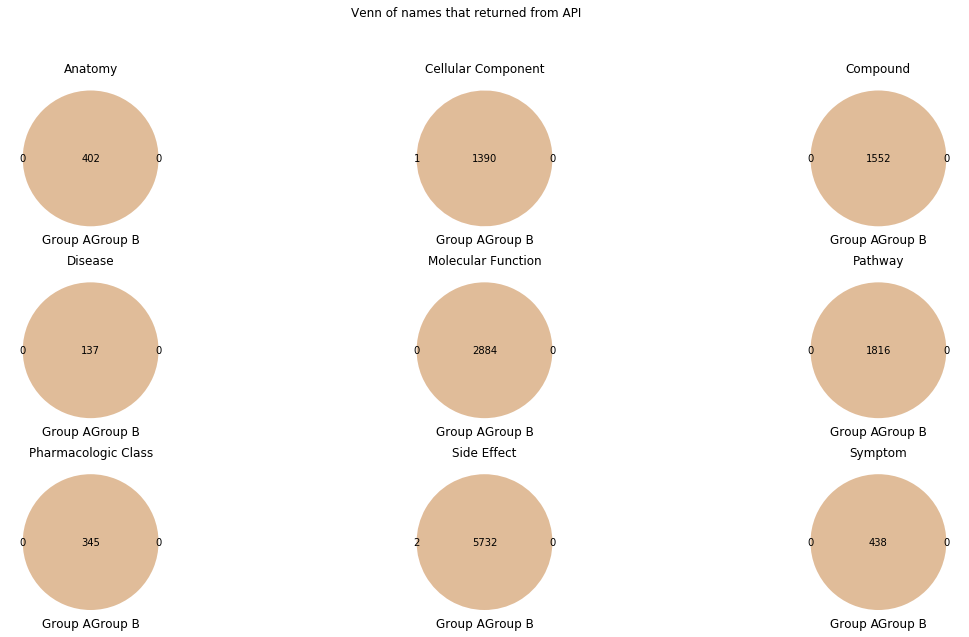

{'data': b'x\x9c\xec\xdd\x07|\x14e\xfe?p\x01\x11\x94\xde\x04\x01\xe9\n\xb6CQ,XQl\xa0X\x0eNl\xa7\xe2\xfdU\xec\xf5\xb0+\x87\x8d\x13\xf5\xbc\x9f\x88\x86\xde\x9bR\x94\x0e\xe9=\x84$\x84\x14\x92\x90\xb2-\xdb\xb2}\xb3\xbd\xfc\xbf\xc9\x9c{{I\x08!\x99\xddgf\xf6\xf3~}_\xbe\x96q\xb2\x99\x9dg\x9eg>3\x99\x9d9+\x08\x00\x00\x00\x00\x00|8\x8b\xf5\x02\x00\x00\x00\x00\x00H\x04\xb25\x00\x00\x00\x00\x00?\x90\xad\x01\x00\x00\x00\x00\xf8\x81l\r\x00\x00\x00\x00\xc0\x0fdk\x00\x00\x00\x00\x00~ [\x03\x00\x00\x00\x00\xf0\x03\xd9\x1a\x00\x04\xea\xc4\x89\x13W^ye\xcf\x9e=\xbf\xff\xfe{\xd6\xcbr\x1a\x9f|\xf2\xc9\xe3\x8f?\xcez)"\xe2\xd6[o]\xb6lY\x93\x89\x81@\xe0\xe9\xa7\x9f\xee\xdb\xb7\xef\xe4\xc9\x93\x99,\x15\x00\x80`![\x03@\xcb\xee\xba\xeb\xae\x8f>\xfa(|\xca\xce\x9d;\x07\x0f\x1e\xec\xf5z\xa3\xb3\x00s\xe7\xce}\xfd\xf5\xd7\xa3\xf3\xbb\xceTbb\xe2\xb0a\xc3B\xff<\xa3l\xbdj\xd5\xaa\x1bo\xbc\xb1\xdd\xbf\xba\x83?~\xa6Z\xcc\xd6)))\xf4\xf1\xedv{D\x7f5\xad\xe4\xb3\xce:k\xd1\xa2E\xa1)\xd5\xd5\xd54\xa5G\xa3\x91#G~\xf9\xe5\x97\xd

In [16]:
plt = vennPlot.plotVenn1(api_df1, api_df2)
plt.savefig('output/images/filename.png', bbox_inches='tight')
pdf.add_page(orientation = 'Landscape')
w = 250
h = w*2/3
pdf.image('output/images/filename.png', w = w, h = h,x=0, y=40)

In [17]:
pdf.output('output/template.pdf', 'F')